## Fake News Detection using Python
The dataset I am using here for the fake news detection task has data about the news title, news content, and a column known as label that shows whether the news is fake or real. So we can use this dataset to find relationships between fake and real news headlines to understand what type of headlines are in most fake news

## processing Datasets and cleaning data

In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [4]:
"""
Loading the datasets from the datasets folder with csv folder known fake_or_real_news.csv
"""
df = pd.read_csv("data/fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#check the null values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
#check the colums
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [7]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
#check the shape
df.shape

(6335, 4)

## Data visualization

<Axes: >

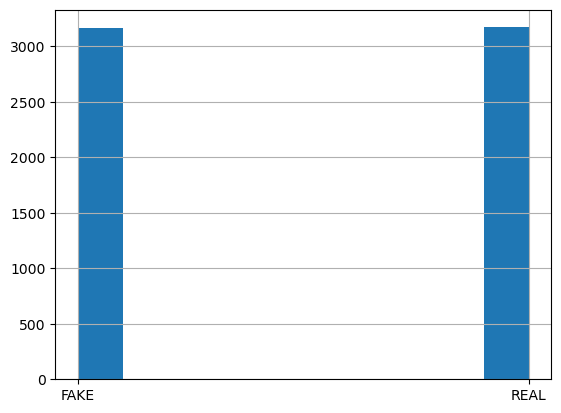

In [13]:
# Draw the histgrom add title
df['label'].hist()

<Axes: ylabel='label'>

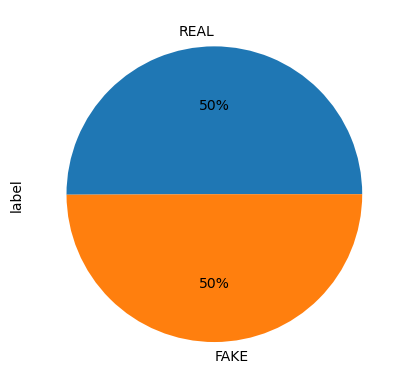

In [11]:
#Draw the piechart
df['label'].value_counts().plot(kind='pie',autopct='%1.0f%%')
    

<Axes: title={'center': 'Fake vs Real News'}>

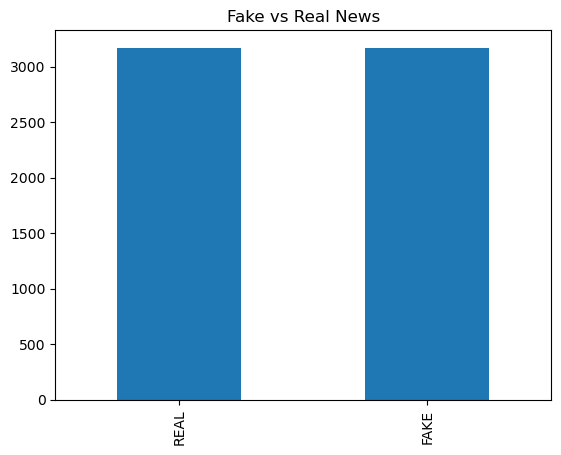

In [12]:
#draw a bar chart with title included
df['label'].value_counts().plot(kind='bar',title='Fake vs Real News')
    

## Training The Model

In [15]:
"""
title column as the feature we need to 
a machine learning model and the label column as 
the values we want to predict:
"""

x = np.array(df["title"])
y = np.array(df["label"])

cv = CountVectorizer()
x = cv.fit_transform(x)

In [16]:
"""
Now let’s separate the dataset into training and testing sets
"""

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8074191002367798


In [18]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['REAL']


In [21]:
news_headline = "i love this work"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['FAKE']


In [22]:
news_headline = "Cow dung can cure Corona Virus"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['FAKE']


In [23]:
news_headline="We ve got to vote and you know Cruz is way, way down in the polls, Trump urged supporters."
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['REAL']


In [24]:
news_headline="• Clinton wrongly claimed Trump supported the war in Iraq after it started, while Trump was wrong, once again, in saying he was against the war before it started."
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['REAL']
